In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [62]:
df = pd.read_csv(r"E:\DataScience\intellipaat\Datasets\python Datasets\Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [63]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


<AxesSubplot:xlabel='Age', ylabel='Density'>

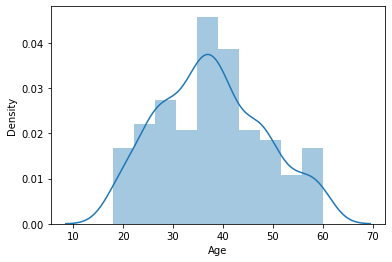

In [65]:
import seaborn as sns
sns.distplot(df['Age'])
plt.show()

### Exploratory Data Analysis

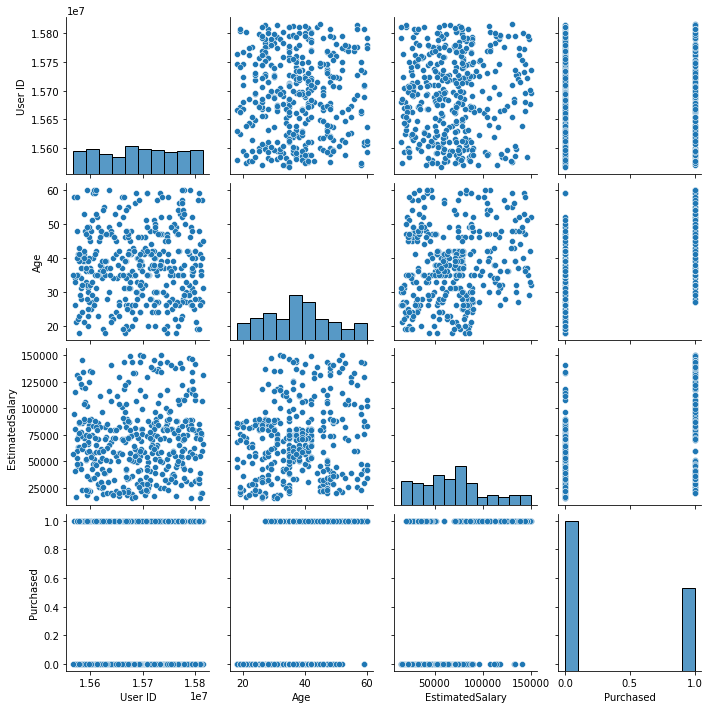

In [66]:
sns.pairplot(df)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

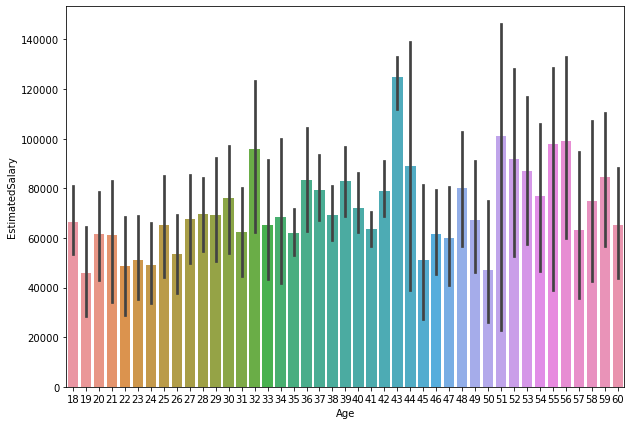

In [67]:
plt.figure(figsize=(10,7))
sns.barplot(x='Age',y = 'EstimatedSalary',data=df)
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='count'>

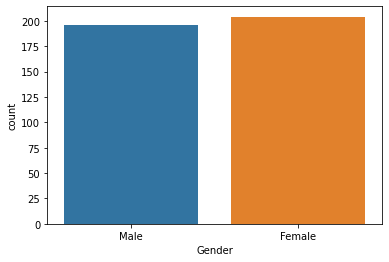

In [68]:
#plt.figure(figsize=(10,7))
sns.countplot(x='Gender',data=df)
plt.show()

<Figure size 720x504 with 0 Axes>

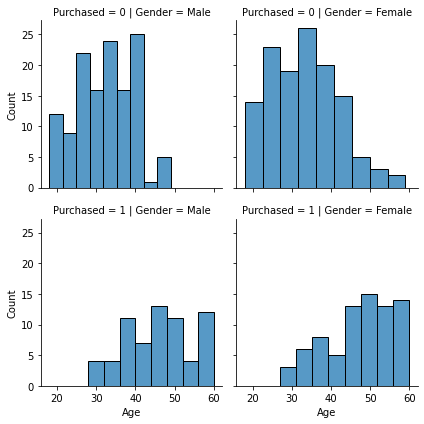

In [69]:
plt.figure(figsize=(10,7))
sns.FacetGrid(df,col="Gender",row="Purchased").map(sns.histplot,"Age")
plt.show()

<AxesSubplot:xlabel='Purchased', ylabel='count'>

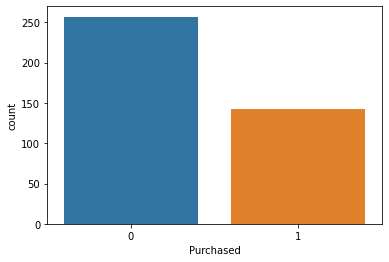

In [70]:
sns.countplot(x='Purchased',data=df)
plt.show()

In [71]:
df.sample()

,User ID,Gender,Age,EstimatedSalary,Purchased
301,15678201,Male,48,74000,1


In [72]:
x = df.iloc[:,1:4]
y = df.iloc[:,-1]

In [73]:
x.head()

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


In [74]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

#### Splitting the data

In [76]:
x = np.asarray(df[["Age","EstimatedSalary"]])
y = np.asarray(df.iloc[:,-1])

#### Normalize the data

In [77]:
x = StandardScaler().fit_transform(x)

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=123)

#### Model preparation

In [82]:
logreg = LogisticRegression(solver='liblinear').fit(x_train,y_train)
y_pred = logreg.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

In [83]:
y_test

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

In [84]:
prob = logreg.predict_proba(x_test)
prob

array([[0.39675489, 0.60324511],
       [0.57827562, 0.42172438],
       [0.69343372, 0.30656628],
       [0.98265478, 0.01734522],
       [0.74093742, 0.25906258],
       [0.82053082, 0.17946918],
       [0.9708296 , 0.0291704 ],
       [0.03682185, 0.96317815],
       [0.43861649, 0.56138351],
       [0.74678294, 0.25321706],
       [0.92768597, 0.07231403],
       [0.55919245, 0.44080755],
       [0.23426388, 0.76573612],
       [0.97678848, 0.02321152],
       [0.90231626, 0.09768374],
       [0.09831253, 0.90168747],
       [0.96448013, 0.03551987],
       [0.90506374, 0.09493626],
       [0.92447002, 0.07552998],
       [0.84029924, 0.15970076],
       [0.95280912, 0.04719088],
       [0.79378119, 0.20621881],
       [0.9932431 , 0.0067569 ],
       [0.86197527, 0.13802473],
       [0.91763011, 0.08236989],
       [0.61947777, 0.38052223],
       [0.98007864, 0.01992136],
       [0.01169846, 0.98830154],
       [0.77530056, 0.22469944],
       [0.48133345, 0.51866655],
       [0.

#### Evaluation

In [86]:
logreg.score(x_test,y_test)

0.84

#### Classification Report

In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        63
           1       0.80      0.76      0.78        37

    accuracy                           0.84       100
   macro avg       0.83      0.82      0.83       100
weighted avg       0.84      0.84      0.84       100



#### confusion matrix

In [88]:
cm = confusion_matrix(y_test,y_pred,labels = logreg.classes_)
print(cm)

tp, fn, fp, tn = confusion_matrix(y_test,y_pred,labels=[1,0]).reshape(-1)

[[56  7]
 [ 9 28]]


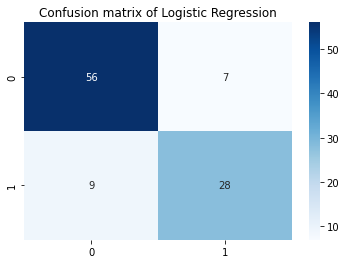

In [92]:
plt.title('Confusion matrix of Logistic Regression')
sns.heatmap(cm,annot=True,cmap='Blues',fmt='g')
plt.show()

In [105]:
print('\nAccuracy: {:.2f}'.format(accuracy_score(y_test,y_pred)))
print('Error Rate: '.format((fp+fn)/(tp+tn+fn+fp)))
print('Sensitivity (Recall or True positive rate) :{:.3f}'.format(tp/(tp+fn)))
print('Specificity:{:.3f}'.format(tn/(fp+tn)))
print('Precision  :{:.2f}'.format(tp/(tp+fp)))
print('False Positive Rate: {:.3f}'.format(fp/(tn+fp)))


Accuracy: 0.84
Error Rate: 
Sensitivity (Recall or True positive rate) :0.757
Specificity:0.889
Precision  :0.80
False Positive Rate: 0.111
